# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

Enunciado de hipotesis:
H0 = No hay diferencias de perdida de peso significativa entre las 2 dietas
H1 = Hay diferencia significativa entre las 2 dietas


In [3]:
import scipy.stats as stats
from scipy.stats import ttest_ind
import numpy as np

In [5]:

# TODO
diet1 =[2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet2 =[3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

t_value, p_value = ttest_ind(diet1, diet2, alternative='two-sided')

print(f"T-value: {t_value}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Rechazo H0")
elif p_value >= 0.05:
    print("Fallo del rechazo de H0")


T-value: -3.5383407969933938
P-value: 0.004083270191713912
Rechazo H0


### Conclusión
Segun los datos obtenidos,se observa una diferencia estadísticamente significativa entre los efectos de la dieta 1 y la dieta 2 sobre la pérdida de peso. Los valores promedio de la dieta 2 son consistentemente más altos, lo que sugiere que esta dieta podría estar asociada con una mayor pérdida de peso.

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

### Hipotesis: 
H0 = no hay diferencia de rendimiento entre los tres tipos de fertilizantes
H1 = Hay diferencia de rendimiento entre los tres tipos de fertilizantes

In [6]:
from scipy.stats import f_oneway


In [9]:
fert1 = [20,21,20,19,20]
fert2 = [22,21,23,22,21]
fert3 = [24,23,22,23,24]

f_stat, p_value = stats.f_oneway(fert1, fert2, fert3)

print(f"F-value: {f_stat}")
print(f"P_value: {p_value}")

if p_value < 0.05:
    print("Rechazo H0")
elif p_value >= 0.05:
    print("Fallo del rechazo de H0")

F-value: 20.31578947368421
P_value: 0.000140478247931904
Rechazo H0


### Conclusión

Dado que el P-value es inferior al nivel de sigificacion, esto indica que existen diferencias estadísticamente significativas entre al menos dos de las medias de los grupos de fertilizantes analizados.

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Unimos los datos
valores = fert1 + fert2 + fert3
grupos = ['fert1']*len(fert1) + ['fert2']*len(fert2) + ['fert3']*len(fert3)

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=valores, groups=grupos, alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
 fert1  fert2      1.8 0.0099 0.4572 3.1428   True
 fert1  fert3      3.2 0.0001 1.8572 4.5428   True
 fert2  fert3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


### Conclusiones 

Fertilizante 1: tiene la media más baja y menor variabilidad.

Fertilizante 2: mejora un poco, pero sigue por debajo del tercero.

Fertilizante 3: tiene la media más alta lo que sugiere mayor rendimiento y consistencia.

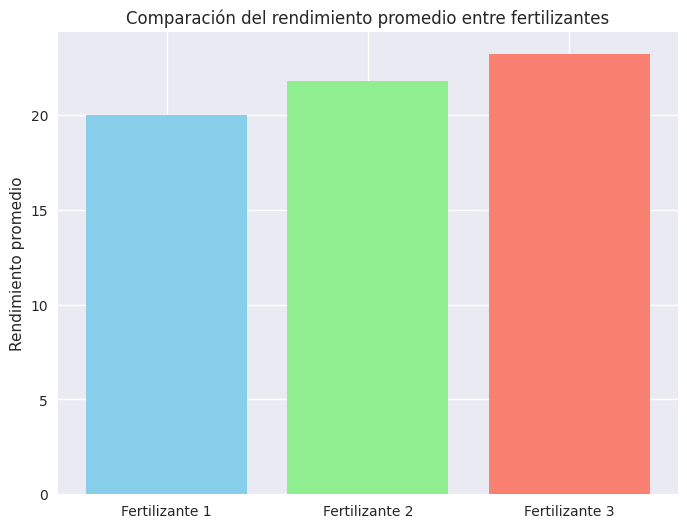

In [ ]:
import numpy as np

medias = [np.mean(fert1), np.mean(fert2), np.mean(fert3)]

plt.figure(figsize=(8,6))
plt.bar(['Fertilizante 1', 'Fertilizante 2', 'Fertilizante 3'],
        medias, capsize=5, color=['skyblue','lightgreen','salmon'])
plt.ylabel('Rendimiento promedio')
plt.title('Comparación del rendimiento promedio entre fertilizantes')
plt.show()